# Pymaceuticals Inc.
---

### Analysis

Review of Capomulin vs. other cancer drugs for treatment of Squamos Cell Tumors
 
At first review, Capomulin did very well in decreasing the size of squamos cell tumors over a period of time. When taking a big picture look at the box plot of the four main drugs of comparison, Capomulin, Ramicane, Infubinol and Ceftamin, both Capomulin and Ramicane have very low tumor volumes at the end of the study without any outliers in thier plotted data. Also, the single example of Mouse l509 treated with Capomulin shows a dramatic decrease in tumor size over the course of treatment. When assessing the box plot that shows how many times the tumors were checked per drug, both Capomulin and Ramicane had more checkpoints than the other drugs, meaning there are more data points to pull from when assessing the results. 
 
When digging deeper, we get even more information. In our Summary Statistics table, we see that Capomulin and Ramicane both have the lowest average tumor volume at the end of the study. They also have close values for mean and median in regard to those values, meaning the data is a good representation of the whole picture. This is further confirmed by their variances being greater than 1 but also closest to 1 when compared to the other drugs in the study. They also have smaller standard deviations and standard deviation errors than the other drugs in the study.
 
The final interesting point is the scatter plot showing how mouse weight is compared to the tumor size. This plot is specific to Capomulin and reveals the heavier the mouse is, the larger their tumor will be, regardless of the point in treatment. The correlation between these variables of .84 shows a strong relationship (given it is close to 1.0) and a valid prediction that this trend is true and will continue. 
      
Given the Ramicane results by Tumor Volume in our Summary Statistics table are slightly better than the Capomulin results and the Box and Whisker plot indicates the data is valid and trustworthy, it would be best to peform more data analysis on Ramicane to see if it is better at treating squamos cell tumors regardless of how large the mouse is. If it reveals the same trend as Capomulin, I would regard these drugs as nearly equal in ability to treat squamos cell tumors. If it reveals to lessen the tumor size regardless of how large the mouse is, I would state Ramicane is a better treatment option than Capomulin.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceutical_main=pd.merge(study_results, mouse_metadata, how ="outer", on = "Mouse ID")

# Display the data table for preview
pymaceutical_main.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
mice = pymaceutical_main["Mouse ID"].nunique()
mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pymaceutical_main.loc[pymaceutical_main.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = pymaceutical_main.loc[pymaceutical_main["Mouse ID"]=="g989"]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceutical_clean = pymaceutical_main[pymaceutical_main["Mouse ID"].isin(duplicate_mice)==False]
pymaceutical_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = pymaceutical_clean["Mouse ID"].nunique()
cleaned_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = pymaceutical_clean["Tumor Volume (mm3)"].groupby(pymaceutical_clean["Drug Regimen"]).mean()
median_tumor_volume = pymaceutical_clean["Tumor Volume (mm3)"].groupby(pymaceutical_clean["Drug Regimen"]).median()
tumor_volume_variance = pymaceutical_clean["Tumor Volume (mm3)"].groupby(pymaceutical_clean["Drug Regimen"]).var()
tumor_volume_stddev = pymaceutical_clean["Tumor Volume (mm3)"].groupby(pymaceutical_clean["Drug Regimen"]).std()
tumor_volume_SEM = pymaceutical_clean["Tumor Volume (mm3)"].groupby(pymaceutical_clean["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame(
    { 
    "Mean Tumor Voume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_stddev,
    "Tumor Volume Std. Err.":tumor_volume_SEM
    }
)
summary_df

,Mean Tumor Voume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary2_df = pymaceutical_clean.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

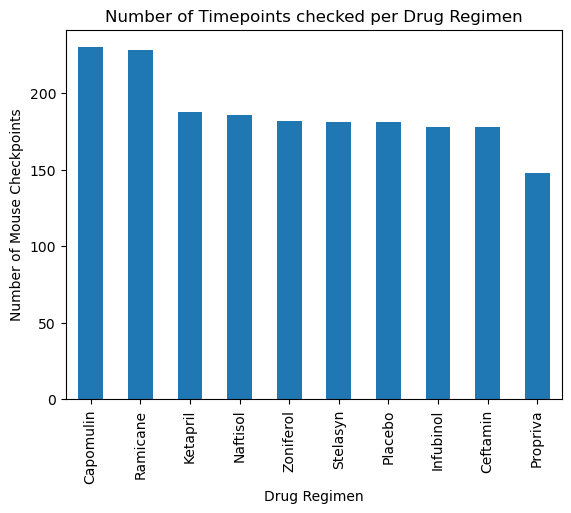

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = pymaceutical_clean["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind = "bar", title = "Number of Timepoints checked per Drug Regimen", xlabel="Drug Regimen", ylabel="Number of Mouse Checkpoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

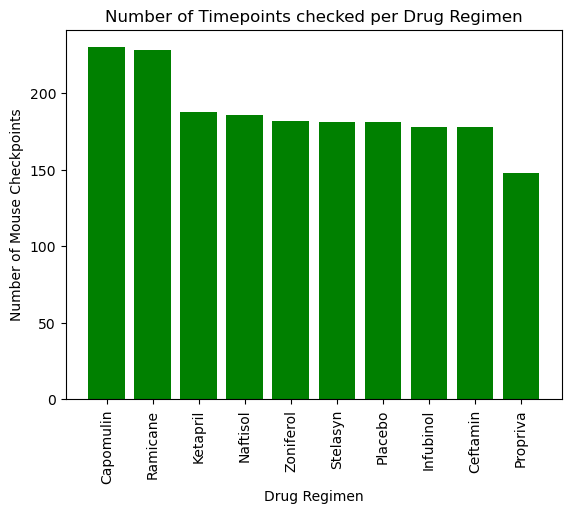

In [11]:
 # Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = pymaceutical_clean["Drug Regimen"].value_counts()

plt.bar(drug_regimen_counts.index.values, drug_regimen_counts.values, color = "g", align = "center")
plt.xticks(rotation = "vertical")
plt.title("Number of Timepoints checked per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Checkpoints")
plt.show

<Axes: title={'center': 'Female vs. Male Mice'}, ylabel='Sex'>

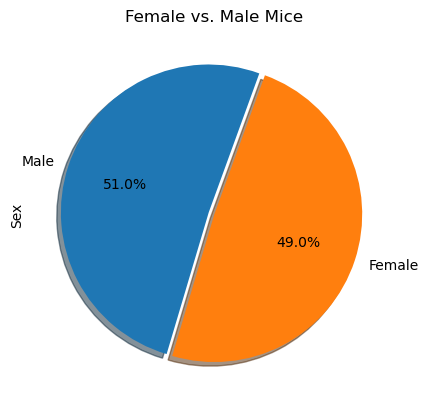

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = pymaceutical_clean["Sex"].value_counts()
mice_gender
mice_gender.plot(kind="pie", y = mice_gender, autopct = "%1.1f%%", title ="Female vs. Male Mice", explode = (.04,0), shadow = True, startangle = 70)

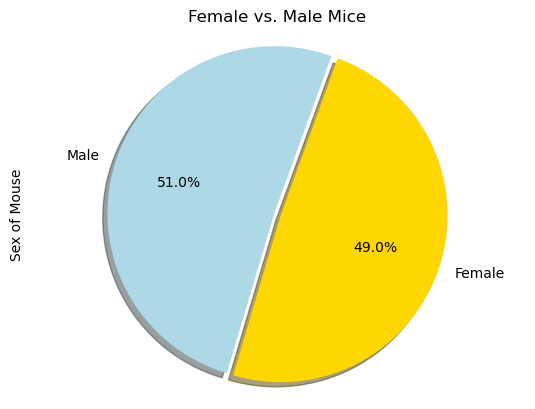

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = pymaceutical_clean["Sex"].value_counts()
labels = mice_gender.index
colors = ["lightblue", "gold"]

mice_pie = plt.pie(mice_gender, labels = labels, autopct="%1.1f%%", colors=colors, explode = (.04,0), shadow = True, startangle = 70)
plt.axis("equal")
plt.title("Female vs. Male Mice")
plt.ylabel("Sex of Mouse")
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
tumor_by_reg = pymaceutical_clean.groupby(["Mouse ID"])["Timepoint"].max()
tumor_by_reg

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_by_tumor = pd.merge(tumor_by_reg, pymaceutical_clean, how = "left", on = ["Mouse ID", "Timepoint"])
mice_by_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
target_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
max_tumor_volume = []
# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in target_drugs:
    tumor_volume = mice_by_tumor.loc[mice_by_tumor["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
     
     # add subset 
    max_tumor_volume.append(tumor_volume)
    max_tumor_volume

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


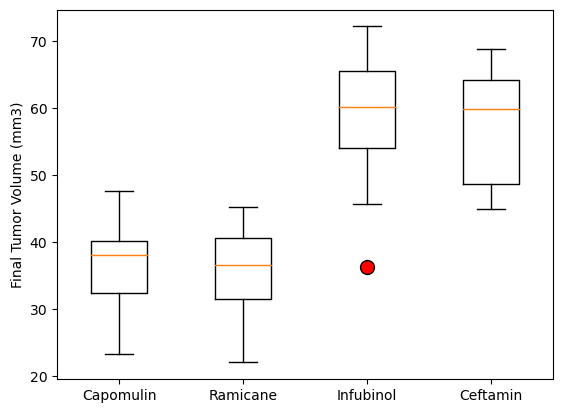

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(max_tumor_volume, labels = target_drugs, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

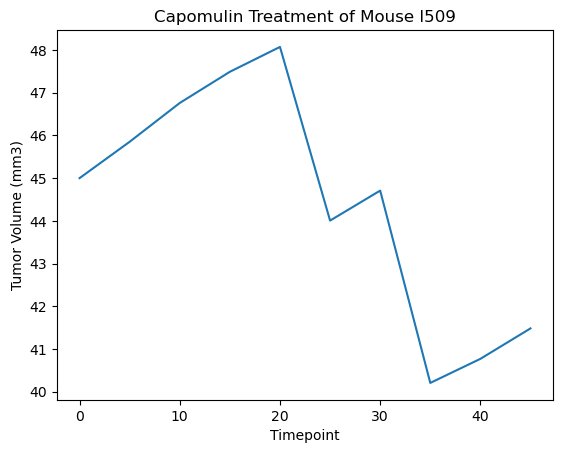

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_loc = pymaceutical_clean.loc[pymaceutical_clean["Drug Regimen"] == "Capomulin", :]
mouse_loc = cap_loc.loc[cap_loc["Mouse ID"]== "l509", :]

x_axis = mouse_loc["Timepoint"]
y_axis = mouse_loc["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

C:\Users\evapa\AppData\Local\Temp\ipykernel_20344\718720244.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_vol = cap_loc.groupby(["Mouse ID"]).mean()


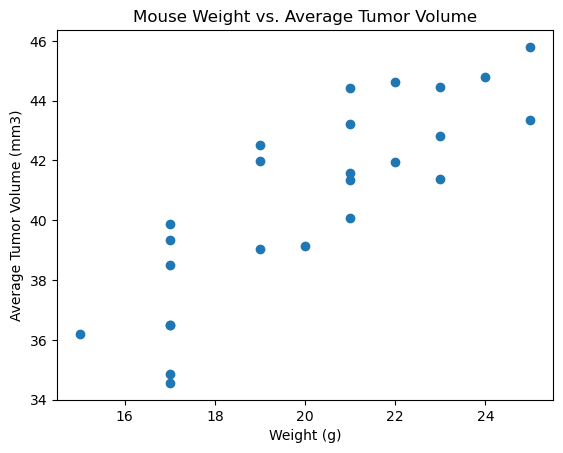

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_loc = pymaceutical_clean.loc[pymaceutical_clean["Drug Regimen"] == "Capomulin", :]
average_vol = cap_loc.groupby(["Mouse ID"]).mean()

plt.scatter(average_vol["Weight (g)"], average_vol["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


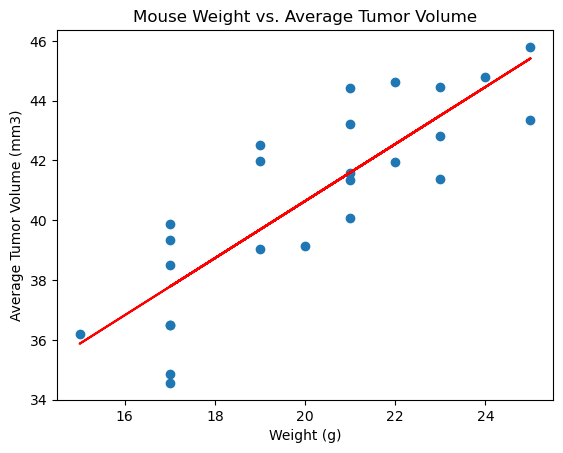

In [59]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_vol["Weight (g)"], average_vol["Tumor Volume (mm3)"])
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

x_values = average_vol["Weight (g)"]
y_values = average_vol["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values)
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = (x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.show()